In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
print(tf.__version__)

2.0.0


In [7]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [9]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [10]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 143s 2ms/sample - loss: 0.3275 - accuracy: 0.8952 - val_loss: 0.1175 - val_accuracy: 0.9646
Epoch 2/10
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.1028 - accuracy: 0.9694 - val_loss: 0.0827 - val_accuracy: 0.9754
Epoch 3/10
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.0735 - accuracy: 0.9774 - val_loss: 0.0708 - val_accuracy: 0.9794
Epoch 4/10
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.0541 - accuracy: 0.9838 - val_loss: 0.0619 - val_accuracy: 0.9821
Epoch 5/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0483 - val_accuracy: 0.9845
Epoch 6/10
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0502 - val_accuracy: 0.9856
Epoch 7/10
60000/60000 [==========================

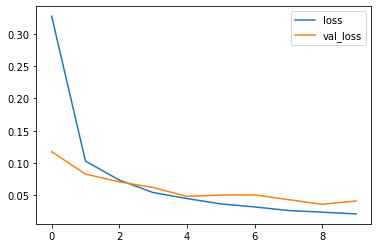

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

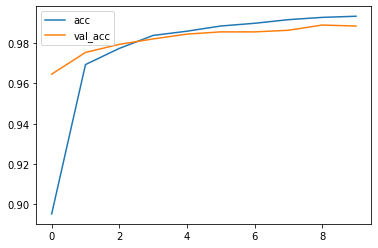

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 974    0    2    0    1    1    0    2    0    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   0    0 1027    1    0    0    1    3    0    0]
 [   0    0    4 1001    0    0    0    2    3    0]
 [   1    1    0    0  964    0    3    1    1   11]
 [   2    0    0    8    0  876    1    2    1    2]
 [   4    5    0    1    9    2  934    0    2    1]
 [   1    2    5    2    1    0    0 1017    0    0]
 [   0    2    2    0    0    4    0    4  962    0]
 [   0    0    0    1    3    1    1    3    4  996]]


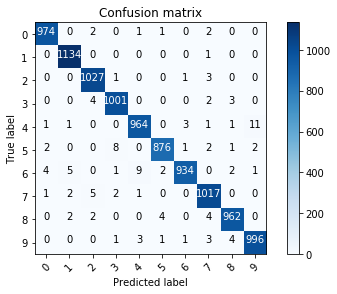

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

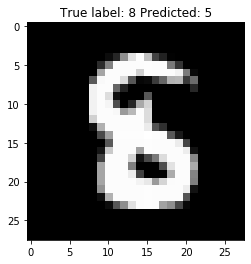

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));